### Clustering with the Iris Dataset

- Using this lesson as a guide, perform clustering on the iris dataset.

- Choose features other than the ones used in the lesson.
- Visualize the results of your clustering.
- Use the elbow method to visually select a good value for k.
- Repeat the clustering, this time with 3 different features.

In [45]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

from sklearn.cluster import KMeans

import env
import os
import wrangle_mall

def get_connection(db, user=env.user, host=env.host, password=env.password):
    return f'mysql+pymysql://{user}:{password}@{host}/{db}'
    
np.random.seed(4)

def new_iris_data():
    return pd.read_sql('SELECT * FROM species JOIN measurements USING(species_id);', get_connection('iris_db'))

def get_iris_data():
    filename2 = "iris.csv"
    
    # if file is available locally, read it
    if os.path.isfile(filename2):
        return pd.read_csv(filename2)
    
    # if file not available locally, acquire data from SQL database
    # and write it as csv locally for future use
    else:
        # read the SQL query into a dataframe
        df = new_iris_data()
        
        # Write that dataframe to disk for later. Called "caching" the data for later.
        df.to_csv(filename2, index=False)

        # Return the dataframe to the calling code
        return df  
    


In [5]:
df = get_iris_data()
df.head()

,species_id,species_name,measurement_id,sepal_length,sepal_width,petal_length,petal_width
0,1,setosa,1,5.1,3.5,1.4,0.2
1,1,setosa,2,4.9,3.0,1.4,0.2
2,1,setosa,3,4.7,3.2,1.3,0.2
3,1,setosa,4,4.6,3.1,1.5,0.2
4,1,setosa,5,5.0,3.6,1.4,0.2


In [23]:
X = df[['petal_length', 'petal_width']]


In [24]:
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int32)

In [25]:
df['cluster'] = kmeans.predict(X)

In [26]:
kmeans.cluster_centers_

array([[5.59583333, 2.0375    ],
       [1.462     , 0.246     ],
       [4.26923077, 1.34230769]])

In [27]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,petal_width
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


In [28]:
df.groupby('cluster')['petal_length', 'petal_width'].mean()


,petal_length,petal_width
cluster,,
0,5.595833,2.037500
1,1.462000,0.246000
2,4.269231,1.342308


Text(0.5, 1.0, 'Visualizing Cluster Centers')

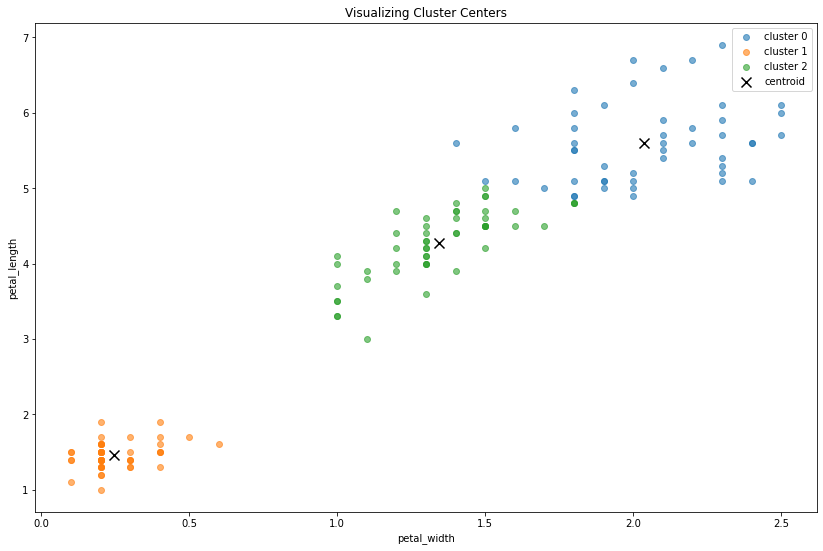

In [29]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.petal_width, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='petal_width', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('petal_width')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

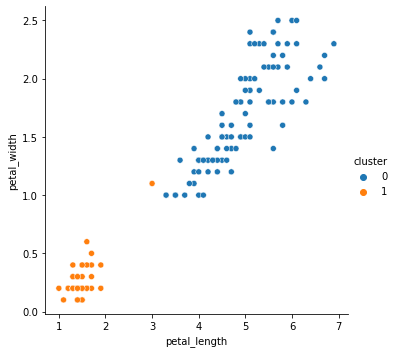

In [30]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='petal_length', y='petal_width', hue='cluster')

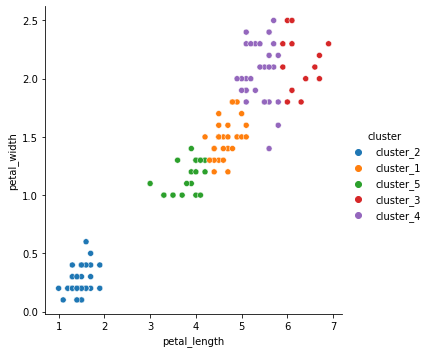

In [31]:
kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='petal_length', y='petal_width', hue='cluster')

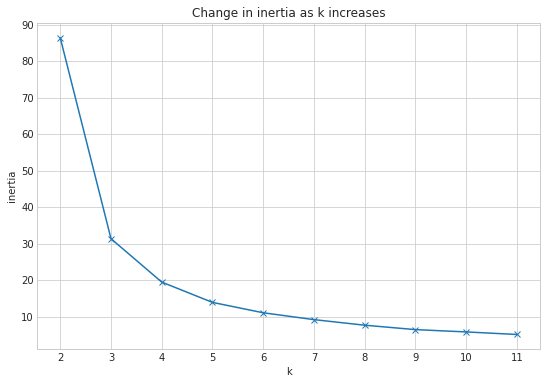

In [32]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

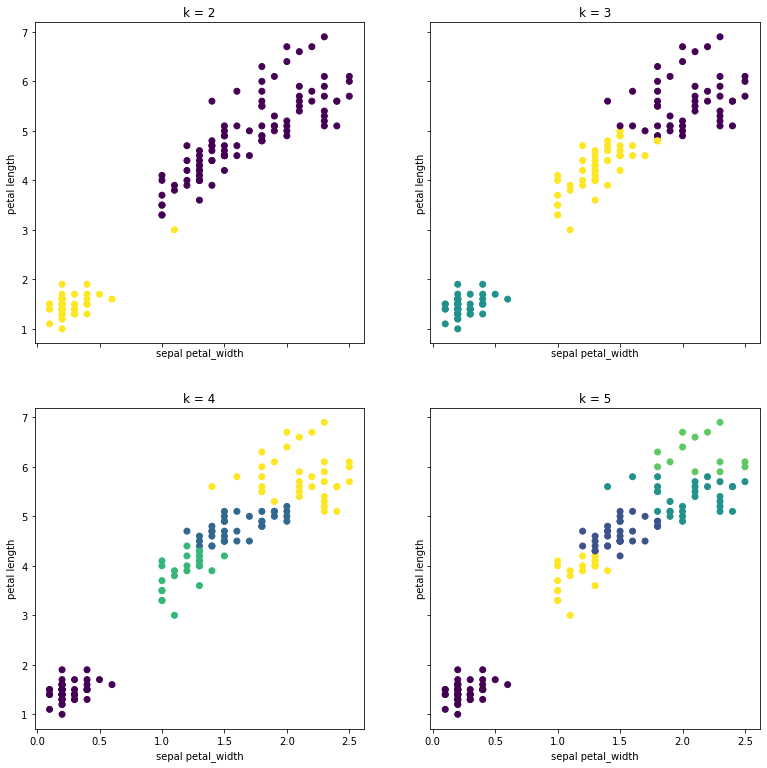

In [33]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal petal_width', ylabel='petal length')

In [34]:
X = df[['petal_length', 'petal_width', 'sepal_length']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0,
       0, 0, 0, 2, 2, 0, 0, 0, 0, 2, 0, 2, 0, 2, 0, 0, 2, 2, 0, 0, 0, 0,
       0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 0, 2, 0, 0, 2], dtype=int32)

In [35]:
df['cluster'] = kmeans.predict(X)
kmeans.cluster_centers_

array([[5.74210526, 2.07105263, 6.85      ],
       [1.462     , 0.246     , 5.006     ],
       [4.39354839, 1.43387097, 5.9016129 ]])

In [36]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,petal_length,petal_width,sepal_length
0,5.742105,2.071053,6.850000
1,1.462000,0.246000,5.006000
2,4.393548,1.433871,5.901613


In [38]:
df.groupby('cluster')['petal_length', 'petal_width', 'sepal_length'].mean()


,petal_length,petal_width,sepal_length
cluster,,,
0,5.742105,2.071053,6.850000
1,1.462000,0.246000,5.006000
2,4.393548,1.433871,5.901613


Text(0.5, 1.0, 'Visualizing Cluster Centers')

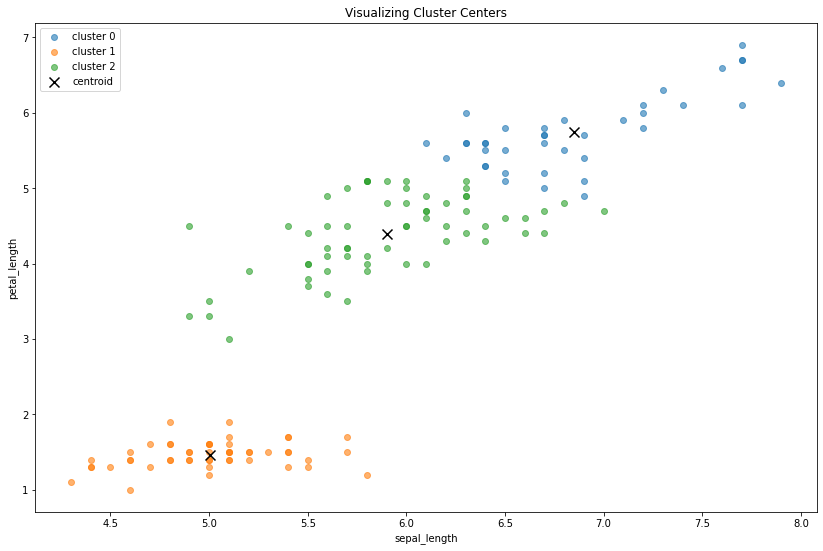

In [40]:
plt.figure(figsize=(14, 9))

for cluster, subset in df.groupby('cluster'):
    plt.scatter(subset.sepal_length, subset.petal_length, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='petal_length', x='sepal_length', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('sepal_length')
plt.ylabel('petal_length')
plt.title('Visualizing Cluster Centers')

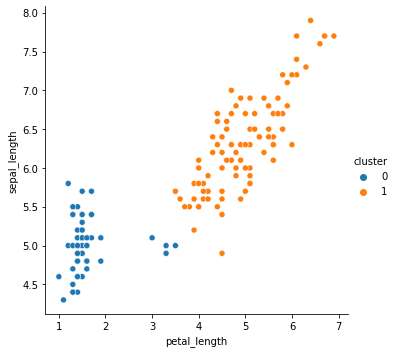

In [41]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
df['cluster'] = kmeans.predict(X)

sns.relplot(data=df, x='petal_length', y='sepal_length', hue='cluster')

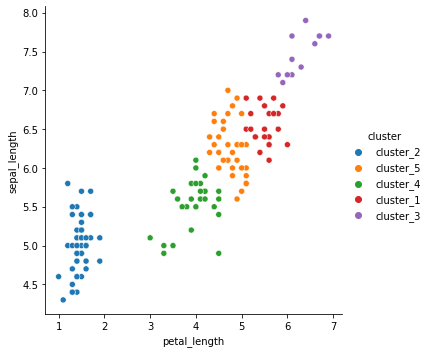

In [42]:
kmeans = KMeans(n_clusters=5).fit(X)
df['cluster'] = kmeans.predict(X)
df.cluster = 'cluster_' + (df.cluster + 1).astype('str')
sns.relplot(data=df, x='petal_length', y='sepal_length', hue='cluster')

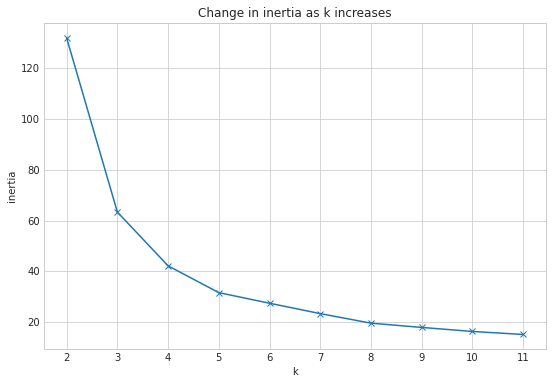

In [43]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

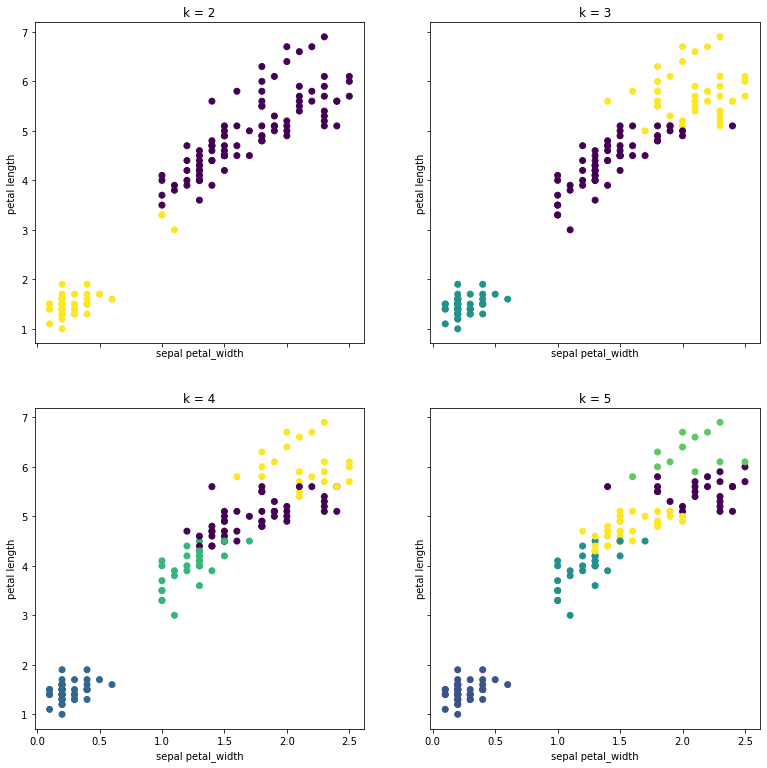

In [44]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.petal_width, X.petal_length, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='sepal petal_width', ylabel='petal length')

### Use the techniques discussed in this lesson, as well as the insights gained from the exploration exercise to perform clustering on the mall customers dataset. Be sure to visualize your results!

In [46]:
df, train, validate, test, train_scaled, validate_scaled, test_scaled = wrangle_mall.wrangle_mall()

Shape: (200, 4)
------------------------------

Info:

<class 'pandas.core.frame.DataFrame'>
Int64Index: 200 entries, 1 to 200
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   gender          200 non-null    object
 1   age             200 non-null    int64 
 2   annual_income   200 non-null    int64 
 3   spending_score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 7.8+ KB
None
------------------------------

Describe:

                count   mean        std   min    25%   50%   75%    max
age             200.0  38.85  13.969007  18.0  28.75  36.0  49.0   70.0
annual_income   200.0  60.56  26.264721  15.0  41.50  61.5  78.0  137.0
spending_score  200.0  50.20  25.823522   1.0  34.75  50.0  73.0   99.0
------------------------------

Nulls by Column:

                num_rows_missing  percent_rows_missing
gender                         0                   0.0
age                            

In [48]:
train_scaled.head()

,gender,age,annual_income,spending_score,age_outliers,annual_income_outliers,spending_score_outliers,gender_Female,gender_Male
customer_id,,,,,,,,,
64,Female,54,0.262295,0.617021,0,0.0,0,1,0
49,Female,29,0.204918,0.436170,0,0.0,0,1,0
25,Female,54,0.106557,0.138298,0,0.0,0,1,0
137,Female,44,0.475410,0.063830,0,0.0,0,1,0
177,Male,58,0.598361,0.148936,0,0.0,0,0,1


In [49]:
X = train_scaled[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 1, 1, 1, 0, 0, 1, 2, 0, 2, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 2, 2, 1, 0, 0, 0, 2, 2, 1, 2, 0, 0, 0, 2, 0, 2, 0,
       1, 0, 0, 0, 2, 1, 1, 1, 1, 0, 2, 0, 2, 0, 0, 1, 0, 0, 0, 0, 2, 2,
       0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 2, 1, 1, 0, 1, 1, 0, 0, 1, 2,
       0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 2, 2, 0, 2, 0, 0, 2, 1, 1, 1, 0,
       0, 2, 0, 0, 0, 2, 0, 1, 0, 1], dtype=int32)

In [50]:
train_scaled['cluster'] = kmeans.predict(X)
kmeans.cluster_centers_

array([[0.26229508, 0.57256272],
       [0.44071038, 0.19539007],
       [0.59265859, 0.84227567]])

In [51]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score
0,0.262295,0.572563
1,0.440710,0.195390
2,0.592659,0.842276


In [53]:
train_scaled.groupby('cluster')['annual_income', 'spending_score'].mean()


,annual_income,spending_score
cluster,,
0,0.262295,0.572563
1,0.440710,0.195390
2,0.592659,0.842276


Text(0.5, 1.0, 'Visualizing Cluster Centers')

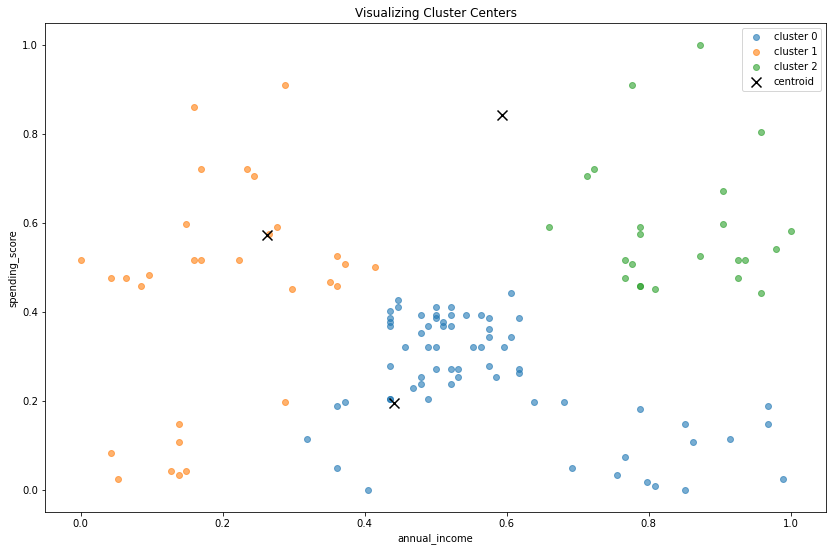

In [54]:
plt.figure(figsize=(14, 9))

for cluster, subset in train_scaled.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='spending_score', x='annual_income', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Cluster Centers')

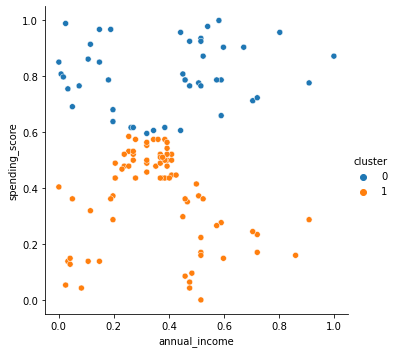

In [56]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X)
train_scaled['cluster'] = kmeans.predict(X)

sns.relplot(data=train_scaled, x='annual_income', y='spending_score', hue='cluster')

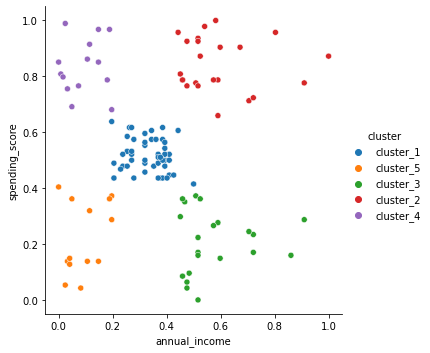

In [57]:
kmeans = KMeans(n_clusters=5).fit(X)
train_scaled['cluster'] = kmeans.predict(X)
train_scaled.cluster = 'cluster_' + (train_scaled.cluster + 1).astype('str')
sns.relplot(data=train_scaled, x='annual_income', y='spending_score', hue='cluster')

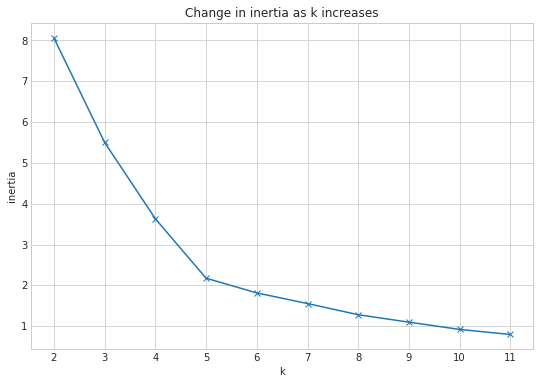

In [58]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

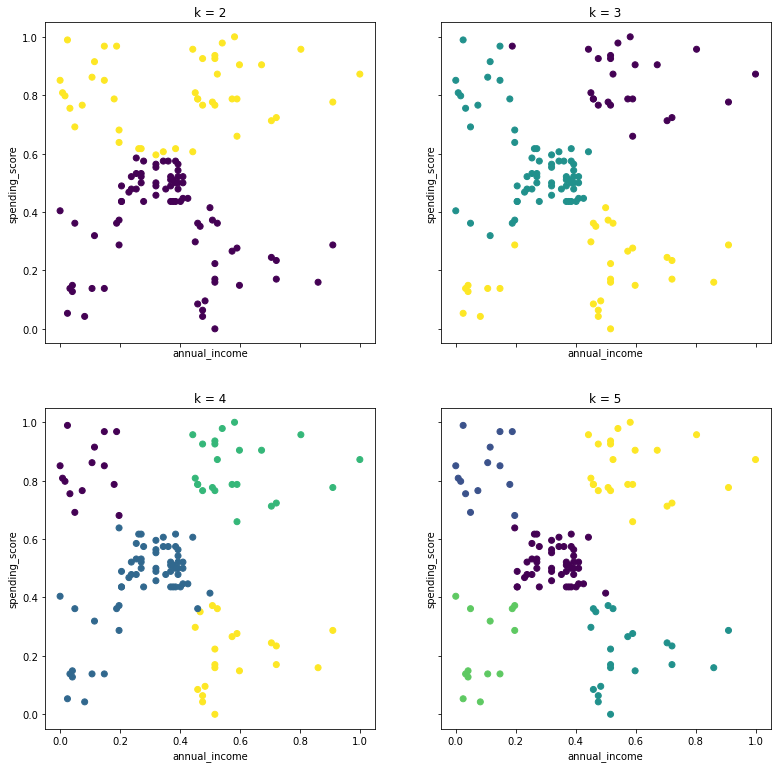

In [59]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')

### Compare k-means clustering results on scaled and unscaled data (you can choose any dataset for this exercise OR use the data/steps outlined in the bonus below). You can show how the resulting clusters differ either with descriptive statistics or visually.

In [60]:
X = train[['annual_income', 'spending_score']]
kmeans = KMeans(n_clusters=3)
kmeans.fit(X)

kmeans.predict(X)

array([0, 0, 0, 2, 2, 0, 0, 2, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       2, 0, 0, 2, 0, 1, 1, 0, 0, 0, 0, 1, 1, 2, 1, 0, 0, 0, 1, 0, 1, 0,
       2, 0, 0, 0, 1, 2, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 0, 0, 0, 0, 1, 1,
       0, 2, 0, 2, 0, 0, 0, 0, 2, 0, 0, 0, 1, 2, 2, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 2, 2, 2, 0,
       0, 1, 0, 0, 0, 1, 0, 2, 0, 0], dtype=int32)

In [61]:
train['cluster'] = kmeans.predict(X)
kmeans.cluster_centers_

array([[44.68      , 50.42666667],
       [87.30434783, 80.17391304],
       [84.59090909, 21.45454545]])

In [62]:
centroids = pd.DataFrame(kmeans.cluster_centers_, columns=X.columns)
centroids

,annual_income,spending_score
0,44.680000,50.426667
1,87.304348,80.173913
2,84.590909,21.454545


In [63]:
train.groupby('cluster')['annual_income', 'spending_score'].mean()


,annual_income,spending_score
cluster,,
0,44.680000,50.426667
1,87.304348,80.173913
2,84.590909,21.454545


Text(0.5, 1.0, 'Visualizing Cluster Centers')

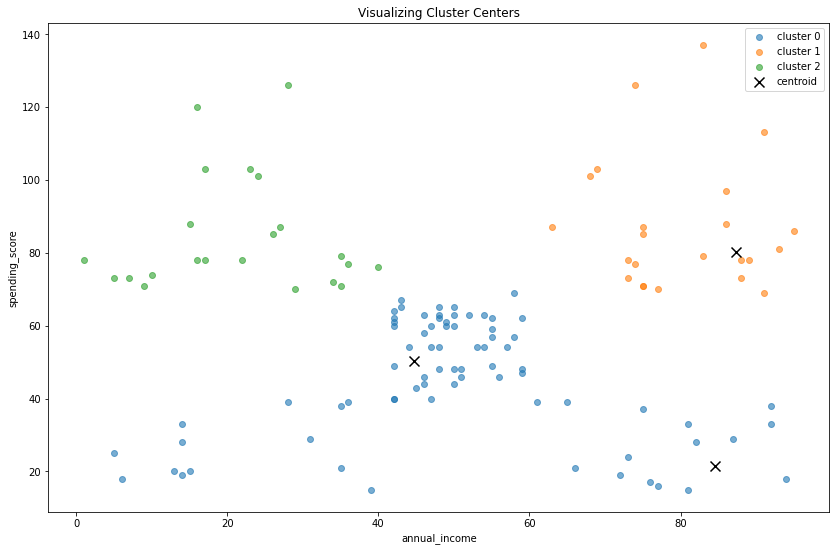

In [64]:
plt.figure(figsize=(14, 9))

for cluster, subset in train.groupby('cluster'):
    plt.scatter(subset.spending_score, subset.annual_income, label='cluster ' + str(cluster), alpha=.6)

centroids.plot.scatter(y='spending_score', x='annual_income', c='black', marker='x', s=100, ax=plt.gca(), label='centroid')

plt.legend()
plt.xlabel('annual_income')
plt.ylabel('spending_score')
plt.title('Visualizing Cluster Centers')

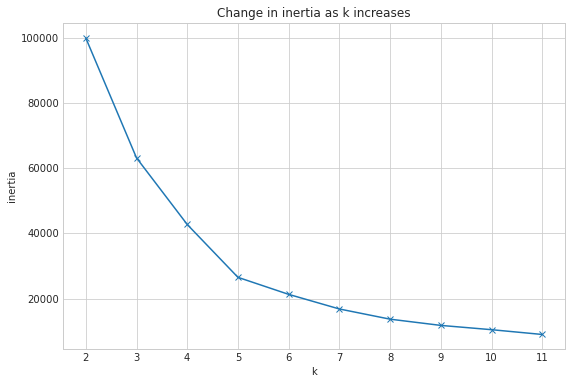

In [65]:
with plt.style.context('seaborn-whitegrid'):
    plt.figure(figsize=(9, 6))
    pd.Series({k: KMeans(k).fit(X).inertia_ for k in range(2, 12)}).plot(marker='x')
    plt.xticks(range(2, 12))
    plt.xlabel('k')
    plt.ylabel('inertia')
    plt.title('Change in inertia as k increases')

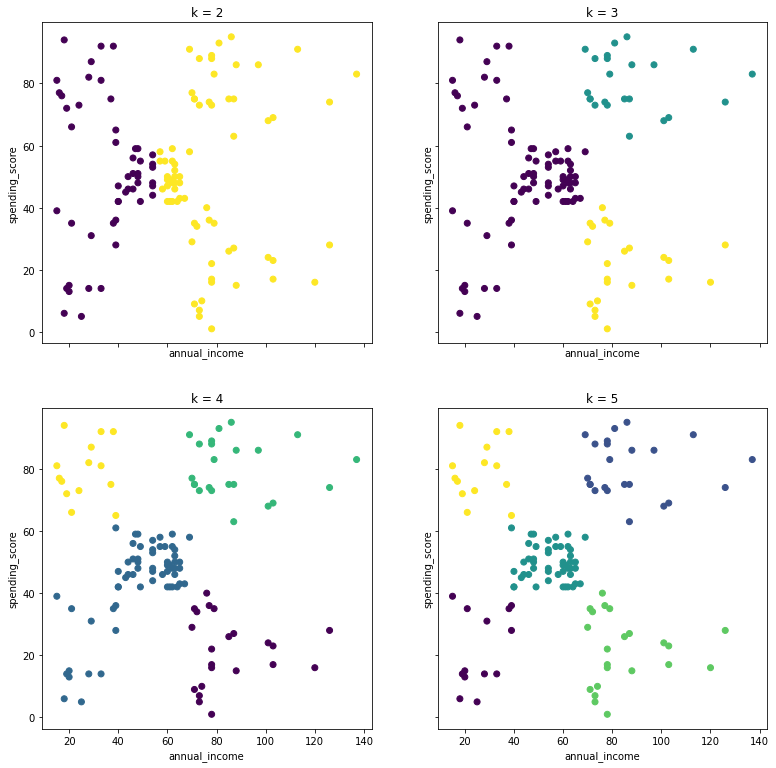

In [66]:
fig, axs = plt.subplots(2, 2, figsize=(13, 13), sharex=True, sharey=True)

for ax, k in zip(axs.ravel(), range(2, 6)):
    clusters = KMeans(k).fit(X).predict(X)
    ax.scatter(X.annual_income, X.spending_score, c=clusters)
    ax.set(title='k = {}'.format(k), xlabel='annual_income', ylabel='spending_score')